In [3]:
import json
import numpy as np
import plotly.graph_objects as go


In [4]:
def json_to_dict(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

In [5]:
week1 = json_to_dict('louvain\communities_output_week1.json')
week2 = json_to_dict('louvain\communities_output_week2.json')
week3 = json_to_dict('louvain\communities_output_week3.json')
week4 = json_to_dict('louvain\communities_output_week4.json')
week5 = json_to_dict('louvain\communities_output_week5.json')
week6 = json_to_dict('louvain\communities_output_week6.json')

In [6]:
communities = [week1, week2, week3, week4, week5, week6]

In [7]:
def build_sankey_data(community_maps):
   
    source = []
    target = []
    values = []
    
    # Get all unique community labels
    all_labels = set()
    for week in community_maps:
        all_labels.update(set(week.values()))
    labels = list(all_labels)
    
    # Create a mapping from community_id to index for Sankey plotting
    label_map = {label: idx for idx, label in enumerate(labels)}
    
    # Track transitions from week to week
    for week_idx in range(len(community_maps) - 1):
        current_week = community_maps[week_idx]
        next_week = community_maps[week_idx + 1]
        
        # Create a (source, target) -> count mapping for transitions
        transition_counts = {}
        
        for hashtag, community_id in current_week.items():
            if hashtag in next_week:
                source_community = community_id
                target_community = next_week[hashtag]
                
                key = (source_community, target_community)
                if key not in transition_counts:
                    transition_counts[key] = 0
                transition_counts[key] += 1
        
        # Populate source, target, and values for Sankey diagram
        for (src, tgt), count in transition_counts.items():
            source.append(label_map[src])
            target.append(label_map[tgt])
            values.append(count)
    
    return source, target, values, labels

In [8]:
def plot_sankey(community_maps):
    source, target, values, labels = build_sankey_data(community_maps)
    
    # Create Sankey diagram using Plotly
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels,
        ),
        link=dict(
            source=source,  # Indices of source nodes
            target=target,  # Indices of target nodes
            value=values    # Flow values (number of hashtags)
        )
    ))
    
    fig.update_layout(title_text="Hashtag Community Transitions Over Time", font_size=15,width=3000, height=1800)
    fig.write_image('test.png')

In [9]:
c = [week1,week2]

In [10]:
plot_sankey(c)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
import numpy as np

def calculate_jaccard_similarity(week1, week2):
    """
    Calculates the Jaccard similarity between two community maps of different sizes.
    
    Args:
        week1 (dict): Community mapping for week 1 (hashtag -> community_id).
        week2 (dict): Community mapping for week 2 (hashtag -> community_id).
    
    Returns:
        float: Jaccard similarity score between communities of two weeks.
    """
    # Create sets of hashtags for each community
    community_sets_week1 = {}
    community_sets_week2 = {}
    
    for hashtag, community in week1.items():
        if community not in community_sets_week1:
            community_sets_week1[community] = set()
        community_sets_week1[community].add(hashtag)
    
    for hashtag, community in week2.items():
        if community not in community_sets_week2:
            community_sets_week2[community] = set()
        community_sets_week2[community].add(hashtag)
    
    # Calculate Jaccard similarity between all community pairs
    similarities = []
    for comm1, hashtags1 in community_sets_week1.items():
        for comm2, hashtags2 in community_sets_week2.items():
            intersection = len(hashtags1.intersection(hashtags2))
            union = len(hashtags1.union(hashtags2))
            if union > 0:
                similarity = intersection / union
                similarities.append(similarity)
    
    # Return average similarity between all compared communities
    if similarities:
        return np.mean(similarities)
    else:
        return 0  # No common hashtags

def build_similarity_matrix(community_maps):
    """
    Builds a similarity matrix comparing communities across consecutive weeks.
    
    Args:
        community_maps (list of dicts): List of community mappings for each week.
    
    Returns:
        numpy.ndarray: Matrix where each element (i, j) is the similarity between weeks i and j.
    """
    num_weeks = len(community_maps)
    similarity_matrix = np.zeros((num_weeks, num_weeks))
    
    for i in range(num_weeks - 1):
        for j in range(i + 1, num_weeks):
            similarity = calculate_jaccard_similarity(community_maps[i], community_maps[j])
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity  # Symmetric matrix
    
    return similarity_matrix

def plot_similarity_heatmap(community_maps):
    """
    Plots a heatmap of Jaccard similarities between communities across weeks.
    
    Args:
        community_maps (list of dicts): List of community mappings for each week.
    """
    similarity_matrix = build_similarity_matrix(community_maps)
    sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', xticklabels=[f"Week {i+1}" for i in range(len(community_maps))], 
                yticklabels=[f"Week {i+1}" for i in range(len(community_maps))])
    plt.title("Community Similarity Across Weeks")
    plt.xlabel("Weeks")
    plt.ylabel("Weeks")
    plt.show()



c:\Users\anush\anaconda3\envs\DataAnalytics\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning:

Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).



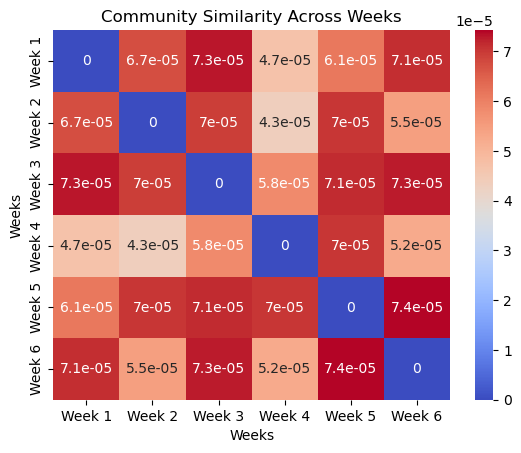

In [12]:
plot_similarity_heatmap(communities)

In [60]:
w1_spectral = json_to_dict('spectral_clustering\week_1_clusters.json')
w2_spectral = json_to_dict('spectral_clustering\week_2_clusters.json')
w3_spectral = json_to_dict('spectral_clustering\week_3_clusters.json')
w4_spectral = json_to_dict('spectral_clustering\week_4_clusters.json')
w5_spectral = json_to_dict('spectral_clustering\week_5_clusters.json')
w6_spectral = json_to_dict('spectral_clustering\week_6_clusters.json')



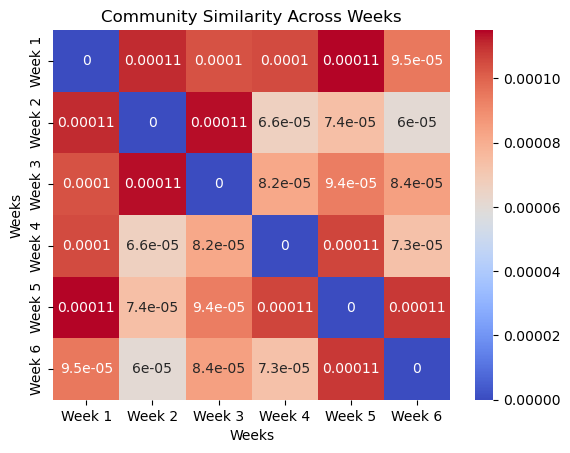

In [ ]:
spectral_comm = [w1_spectral, w2_spectral, w3_spectral, w4_spectral, w5_spectral, w6_spectral]
plot_similarity_heatmap(spectral_comm)
#1->2->5

In [64]:
w1_label = json_to_dict('label_prop_outputs\week1.json')
w2_label = json_to_dict('label_prop_outputs\week2.json')
w3_label = json_to_dict('label_prop_outputs\week3.json')
w4_label = json_to_dict('label_prop_outputs\week4.json')
w5_label = json_to_dict('label_prop_outputs\week5.json')
w6_label = json_to_dict('label_prop_outputs\week6.json')

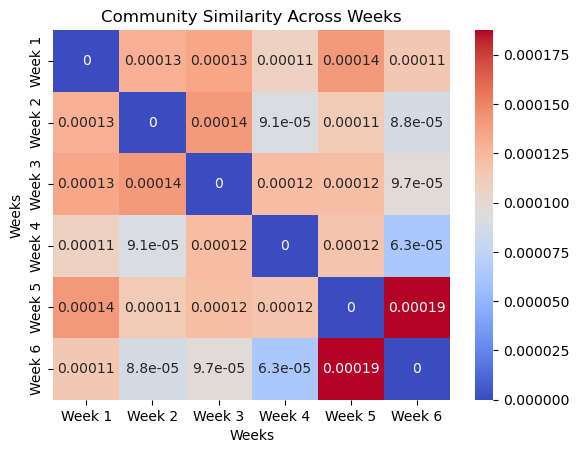

In [ ]:
label_comm = [w1_label, w2_label, w3_label, w4_label, w5_label, w6_label]
plot_similarity_heatmap(label_comm)
#1->3->6

In [13]:
import pandas as pd
def prepare_community_size_data(community_maps):
    """
    Prepares a DataFrame that tracks the size of each community across weeks.
    
    Args:
        community_maps (list of dicts): List of community mappings for each week.
    
    Returns:
        pandas.DataFrame: A DataFrame where rows are weeks and columns are communities, 
                          with values representing the size of the community (number of hashtags).
    """
    community_sizes = {}

    # Iterate through each week's community map
    for week_idx, week_map in enumerate(community_maps):
        week = f"Week {week_idx + 1}"
        community_counts = pd.Series(week_map).value_counts()  # Count occurrences of each community
        community_sizes[week] = community_counts

    # Convert the dictionary into a DataFrame (weeks as rows, communities as columns)
    size_df = pd.DataFrame(community_sizes).fillna(0)  # Fill missing values with 0 (no hashtags for that community)
    total_community_sizes = size_df.sum(axis=1)
    filtered_communities = total_community_sizes[total_community_sizes >= 51].index
    
    return size_df.loc[filtered_communities].T  # Transpose to have weeks as rows and communities as columns

In [14]:
def plot_line_community_size(size_df):
    """
    Plots a line plot for community size trends over time.
    
    Args:
        size_df (pandas.DataFrame): A DataFrame where rows are weeks and columns are communities, 
                                    with values representing community sizes.
    """
    size_df.plot(kind='line', figsize=(10, 6), marker='o')
    plt.title("Community Size Trends Over Time")
    plt.xlabel("Weeks")
    plt.ylabel("Community Size (Number of Hashtags)")
    plt.legend(title="Communities", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

C:\Users\anush\AppData\Local\Temp\ipykernel_6252\700540046.py:15: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



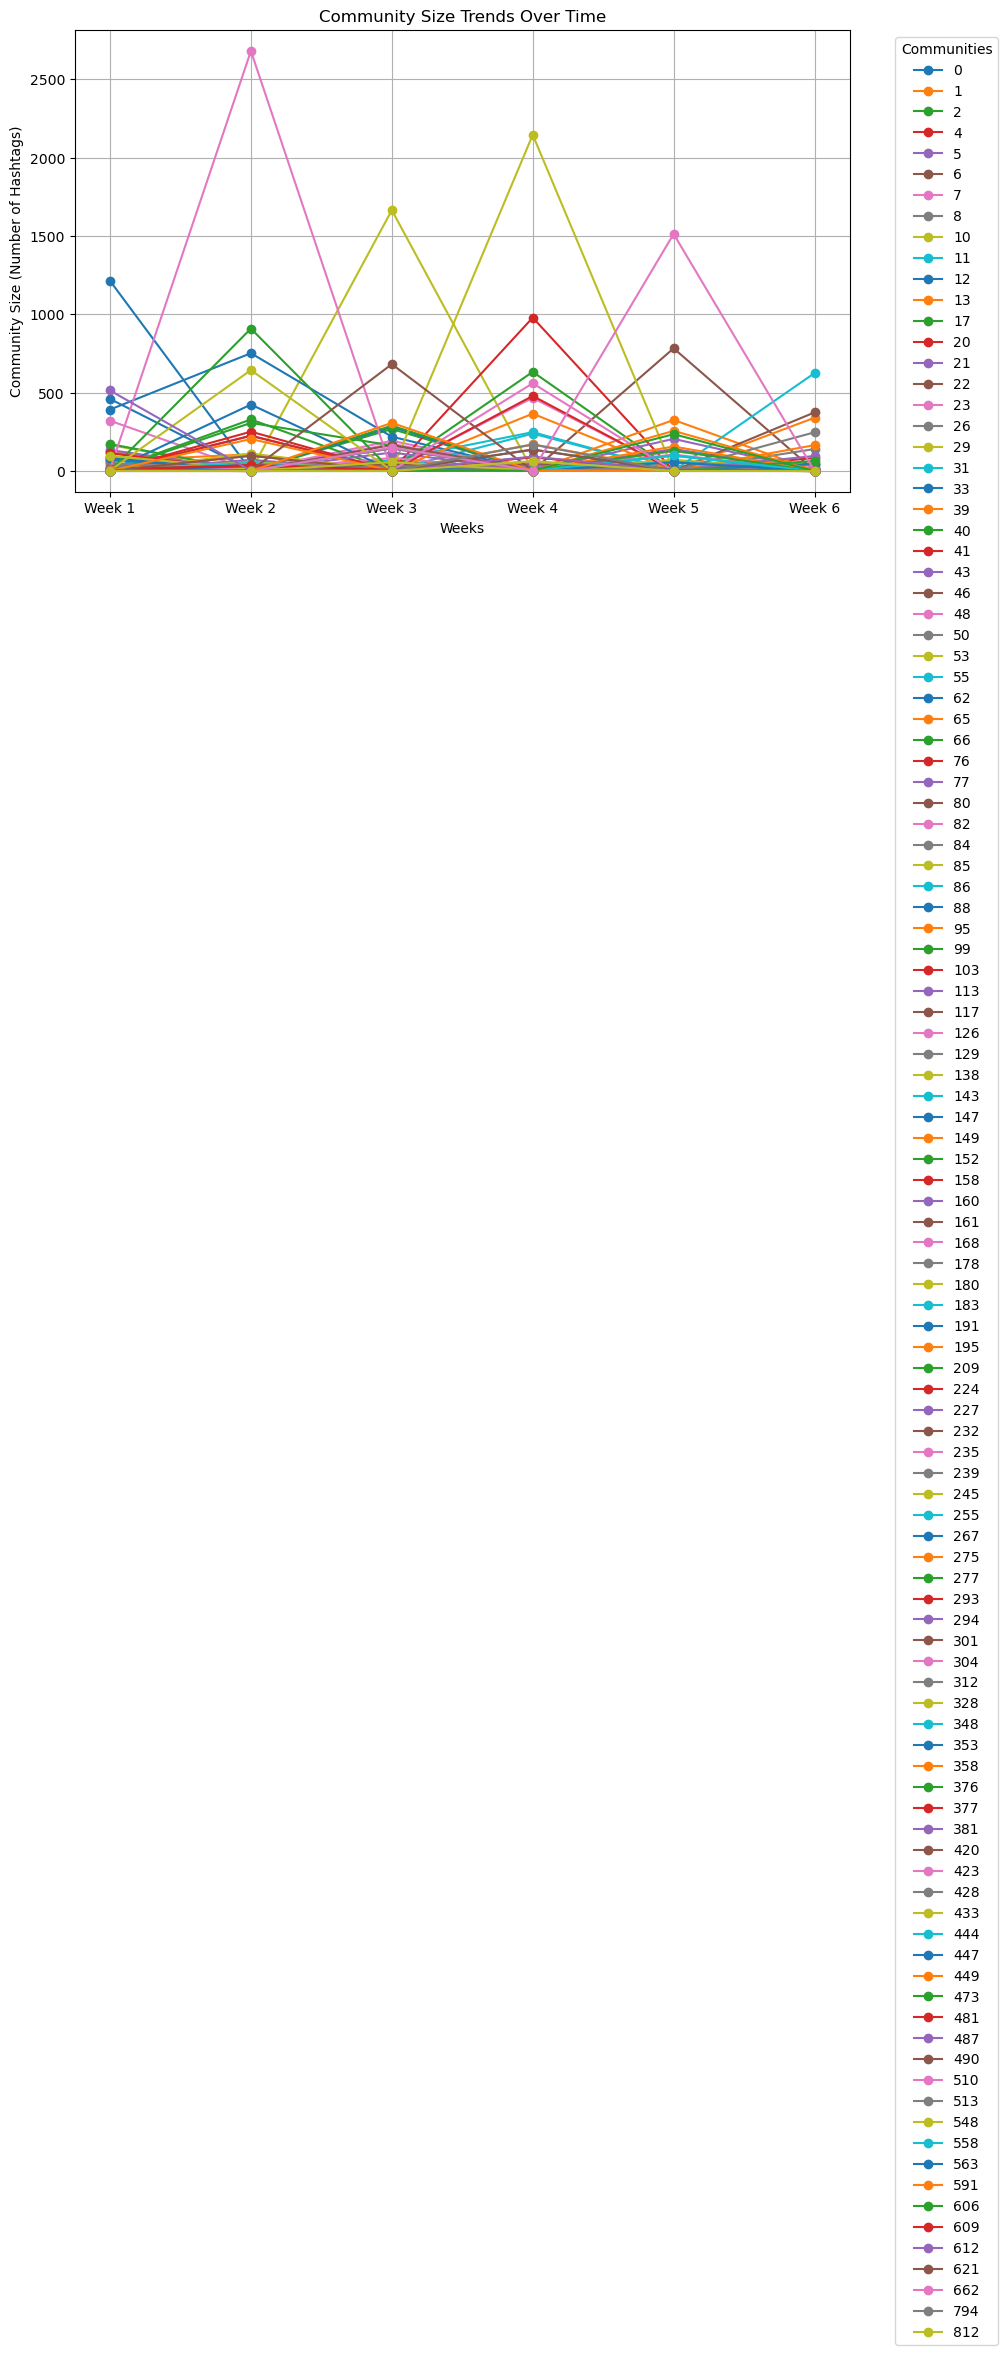

In [15]:
size_df = prepare_community_size_data(community_maps=communities)

# Plot the line plot of community size trends
plot_line_community_size(size_df)

C:\Users\anush\AppData\Local\Temp\ipykernel_6252\2761639043.py:15: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



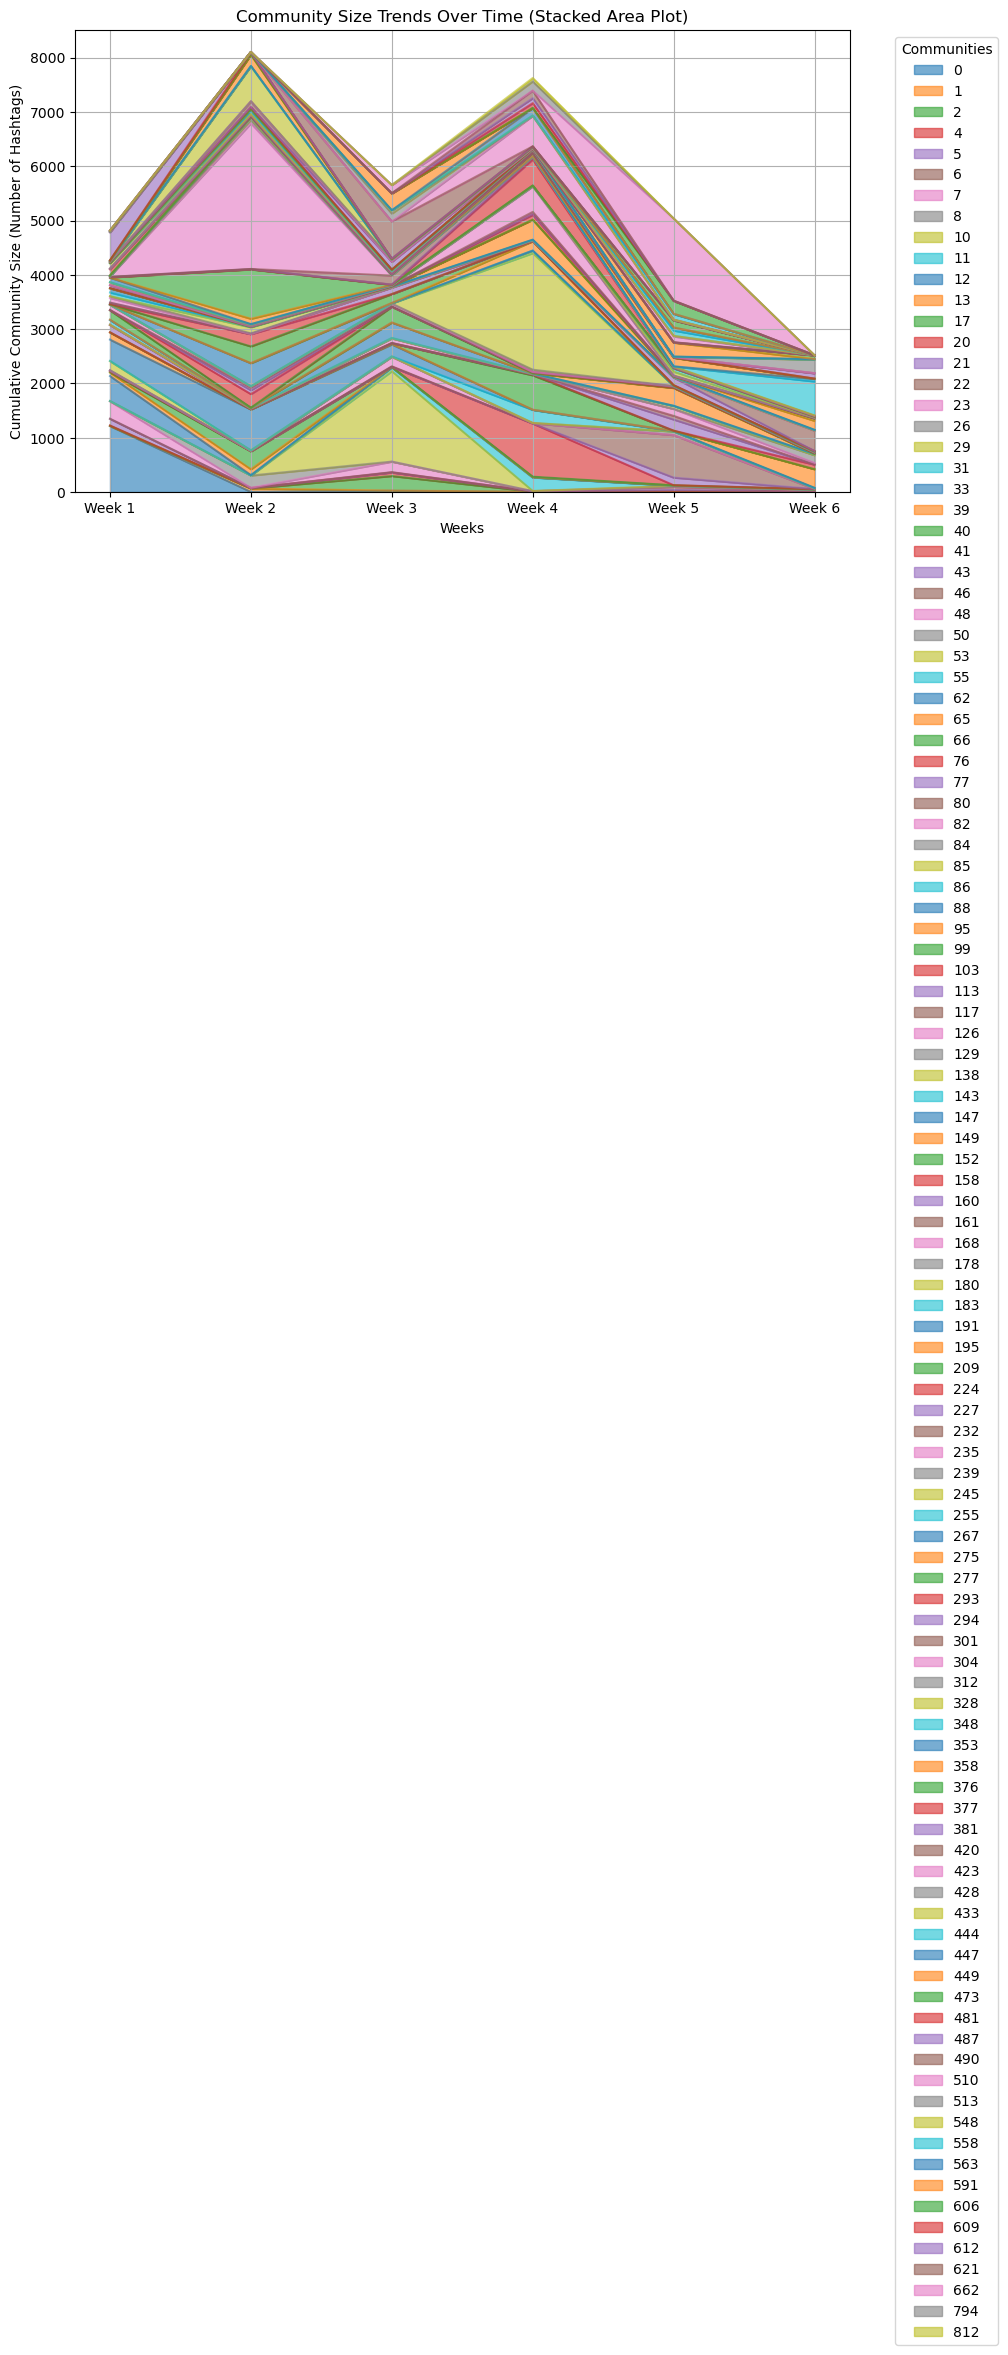

In [16]:
def plot_stacked_area_community_size(size_df):
    """
    Plots a stacked area plot for community size trends over time.
    
    Args:
        size_df (pandas.DataFrame): A DataFrame where rows are weeks and columns are communities, 
                                    with values representing community sizes.
    """
    size_df.plot(kind='area', stacked=True, figsize=(10, 6), alpha=0.6)
    plt.title("Community Size Trends Over Time (Stacked Area Plot)")
    plt.xlabel("Weeks")
    plt.ylabel("Cumulative Community Size (Number of Hashtags)")
    plt.legend(title="Communities", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot the stacked area plot of community size trends
plot_stacked_area_community_size(size_df)


In [17]:
df_week_1 = pd.read_csv('dataframes\week_1.csv', index_col=0)
df_week_2 = pd.read_csv('dataframes\week_2.csv', index_col=0)
df_week_3 = pd.read_csv('dataframes\week_3.csv', index_col=0)
df_week_4 = pd.read_csv('dataframes\week_4.csv', index_col=0)
df_week_5 = pd.read_csv('dataframes\week_5.csv', index_col=0)
df_week_6 = pd.read_csv('dataframes\week_6.csv', index_col=0)

In [18]:
#get the keys of week1 as a list
def construct_list(week1):
    week1_keys = list(week1.keys())
#trim each word in the list of the starting 4 chars
    week1_keys = [x[4:] for x in week1_keys]
    
    #print(week1_keys)
    return week1_keys


In [19]:
from itertools import combinations
def construct_co_matrix(df_week_1, week1_keys):
    #get the hastags from the dataframes and put them in a list
    hashtags_week1 = df_week_1['hashtags'].tolist()
    #remove the "" from the hastags
    hashtags_week1 = [x[1:-1] for x in hashtags_week1]
    #split the hashtags into a list
    hashtags_week1 = [x.split(", ") for x in hashtags_week1]
    #remove the '' from the hashtags
    hashtags_week1 = [[x[1:-1] for x in hashtags] for hashtags in hashtags_week1]
    #remove any words that are not in english
    hashtags_week1 = [[x for x in hashtags if x.isalpha()] for hashtags in hashtags_week1]
    #remove any hashtgs that are not in week_1_keys
    hashtags_week1 = [[x for x in hashtags if x in week1_keys] for hashtags in hashtags_week1]
    cooccurrence_matrix = pd.DataFrame(
        data=np.zeros((len(week1_keys), len(week1_keys)), dtype=int), 
        index=week1_keys, 
        columns=week1_keys
    )
    for hashtag_set in hashtags_week1:
    # For each pair of hashtags in the set, increment the corresponding matrix entry
        for hashtag1, hashtag2 in combinations(hashtag_set, 2):
            cooccurrence_matrix.at[hashtag1, hashtag2] += 1
            cooccurrence_matrix.at[hashtag2, hashtag1] += 1  # Symmetric update

    return cooccurrence_matrix,hashtags_week1
    

In [20]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

def get_word2vec_summary(hashtags_list, n_clusters=1):
    """
    Uses Word2Vec and k-means clustering to summarize the community of hashtags.
    
    Args:
        hashtags_list (list of list of str): List of lists, where each inner list contains co-occurring hashtags.
        n_clusters (int): Number of clusters to use.
    
    Returns:
        list of str: Cluster centroids representing the community.
    """
    # Train Word2Vec model on the hashtags
    model = Word2Vec(sentences=hashtags_list, vector_size=100, window=5, min_count=1, workers=4)
    
    # Get word vectors for hashtags
    word_vectors = model.wv
    
    # Perform k-means clustering on the word vectors
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(word_vectors.vectors)
    
    # Get top words from cluster centroids (the hashtags most representative of each cluster)
    cluster_centers = kmeans.cluster_centers_
    top_hashtags = [word_vectors.similar_by_vector(center, topn=1)[0][0] for center in cluster_centers]
    
    return top_hashtags


In [21]:
import networkx as nx
from networkx.algorithms.community import louvain_communities
from networkx.readwrite import read_gexf
# Assuming G is your graph
# Perform Louvain community detection
def louvain_community(G):
    
    communities = louvain_communities(G)

    # Create a list of lists where each list contains the hashtags (nodes) of a community
    community_hashtags = [list(community) for community in communities]

    return community_hashtags



In [22]:
week1_keys = construct_list(week1)
coo1,hashtags_week1 = construct_co_matrix(df_week_1, week1_keys)
week2_keys = construct_list(week2)
coo2,hashtags_week2 = construct_co_matrix(df_week_2, week2_keys)
week3_keys = construct_list(week3)
coo3,hashtags_week3 = construct_co_matrix(df_week_3, week3_keys)
week4_keys = construct_list(week4)
coo4,hashtags_week4 = construct_co_matrix(df_week_4, week4_keys)
week5_keys = construct_list(week5)
coo5,hashtags_week5 = construct_co_matrix(df_week_5, week5_keys)
week6_keys = construct_list(week6)
coo6,hashtags_week6 = construct_co_matrix(df_week_6, week6_keys)

In [23]:
G1 = read_gexf('graphs\week_1.gexf')
G2 = read_gexf('graphs\week_2.gexf')
G3 = read_gexf('graphs\week_3.gexf')
G4 = read_gexf('graphs\week_4.gexf')
G5 = read_gexf('graphs\week_5.gexf')
G6 = read_gexf('graphs\week_6.gexf')

In [24]:
community_hashtags_1 = louvain_community(G1)
community_hashtags_2 = louvain_community(G2)
community_hashtags_3 = louvain_community(G3)
community_hashtags_4 = louvain_community(G4)
community_hashtags_5 = louvain_community(G5)
community_hashtags_6 = louvain_community(G6)

In [25]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np

def summarize_community(community_hashtags, all_hashtags, n_clusters=1, top_n=5):
    """
    Summarizes a community of hashtags using Word2Vec and k-means clustering.
    
    Args:
        community_hashtags (list of str): List of hashtags in the community.
        all_hashtags (list of list of str): List of all hashtag sets across all communities.
        n_clusters (int): Number of clusters to use for summarization.
        top_n (int): Number of top representative hashtags to return.
    
    Returns:
        list of str: Top `top_n` hashtags representing the community.
    """
    # Train Word2Vec model on all hashtags
    model = Word2Vec(sentences=all_hashtags, vector_size=100, window=5, min_count=1, workers=4)
    
    # Get Word2Vec vectors for the community hashtags
    word_vectors = model.wv
    community_vectors = [word_vectors[hashtag] for hashtag in community_hashtags if hashtag in word_vectors]
    
    if len(community_vectors) < n_clusters:
        # If there are fewer vectors than clusters, return top hashtags by frequency
        return sorted(community_hashtags, key=lambda x: community_hashtags.count(x), reverse=True)[:top_n]
    
    # Perform K-means clustering to group the hashtags
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(community_vectors)
    
    # Get cluster centers
    cluster_centers = kmeans.cluster_centers_
    
    # Find the top `top_n` words by ranking their proximity to the cluster centroids
    top_words = []
    for center in cluster_centers:
        similar_words = word_vectors.similar_by_vector(center, topn=top_n)
        top_words.extend([word[0] for word in similar_words])

    # Return the top unique `top_n` words
    return list(dict.fromkeys(top_words))[:top_n]


In [26]:
import os
#You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
os.environ["OMP_NUM_THREADS"] = "1"

In [27]:
summary_week_1 = {}
for idx, community in enumerate(community_hashtags_1):
    summary_week_1[idx] = summarize_community(community, hashtags_week1, n_clusters=5, top_n=5)

c:\Users\anush\anaconda3\envs\DataAnalytics\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\anush\anaconda3\envs\DataAnalytics\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.

c:\Users\anush\anaconda3\envs\DataAnalytics\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\anush\anaconda3\envs\DataAnalytics\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can

In [28]:
summary_week_2 = {}
for idx, community in enumerate(community_hashtags_2):
    summary_week_2[idx] = summarize_community(community, hashtags_week2, n_clusters=5, top_n=5)

c:\Users\anush\anaconda3\envs\DataAnalytics\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\anush\anaconda3\envs\DataAnalytics\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\anush\anaconda3\envs\DataAnalytics\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\anush\anaconda3\envs\DataAnalytics\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can

In [ ]:
summary_week_3= {}
for idx, community in enumerate(community_hashtags_3):
    summary_week_3[idx] = summarize_community(community, hashtags_week3, n_clusters=5, top_n=5)

In [30]:
summary_week_4 = {}
for idx, community in enumerate(community_hashtags_4):
    summary_week_4[idx] = summarize_community(community, hashtags_week4, n_clusters=5, top_n=5)

c:\Users\anush\anaconda3\envs\DataAnalytics\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\anush\anaconda3\envs\DataAnalytics\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\anush\anaconda3\envs\DataAnalytics\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\anush\anaconda3\envs\DataAnalytics\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can

In [31]:
summary_week_5 = {}
for idx, community in enumerate(community_hashtags_5):
    summary_week_5[idx] = summarize_community(community, hashtags_week5, n_clusters=5, top_n=5)

c:\Users\anush\anaconda3\envs\DataAnalytics\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\anush\anaconda3\envs\DataAnalytics\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\anush\anaconda3\envs\DataAnalytics\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\anush\anaconda3\envs\DataAnalytics\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can

In [32]:
summary_week_6 = {} 
for idx, community in enumerate(community_hashtags_6):
    summary_week_6[idx] = summarize_community(community, hashtags_week6, n_clusters=5, top_n=5)

c:\Users\anush\anaconda3\envs\DataAnalytics\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\anush\anaconda3\envs\DataAnalytics\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\anush\anaconda3\envs\DataAnalytics\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\anush\anaconda3\envs\DataAnalytics\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can

In [ ]:
def prepare_community_size_data_modified(community_maps,summary_map):
  
    community_sizes = {}

    # Iterate through each week's community map
    for week_idx, week_map in enumerate(community_maps):
        week = f"Week {week_idx + 1}"
        community_counts = pd.Series(week_map).value_counts()  # Count occurrences of each community
        community_sizes[week] = community_counts

    # Convert the dictionary into a DataFrame (weeks as rows, communities as columns)
    size_df = pd.DataFrame(community_sizes).fillna(0)  # Fill missing values with 0 (no hashtags for that community)
    total_community_sizes = size_df.sum(axis=1)
    filtered_communities = total_community_sizes[total_community_sizes >= 51].index
    return size_df.loc[filtered_communities].T  # Transpose to have weeks as rows and communities as columns

In [57]:
#from community_hastags get the largets community id
community_hashtags_1
maxi =0
ans=-1
sizes = [0]*len(community_hashtags_1)
for idx in range(len(community_hashtags_1)):
    sizes[idx] = len(community_hashtags_1[idx])
  
    

maxi = max(sizes)
maxi_idx = sizes.index(maxi)
tops = summary_week_1[maxi_idx]

In [58]:
#find community id in the summary_week_2 items in tops are occuring
ids =[]
for k,v in summary_week_2.items():
    if any(item in v for item in tops):
        ans = k
        ids.append(ans)

ids

[]

In [67]:
len(community_hashtags_1)

405

In [68]:
summary_week_3[28]

['animation', 'postpandemic', 'bestpractices']

In [69]:
summary_week_4[40]

['idpol', 'pm', 'psgatalanta', 'cementindustry', 'goodthings']

In [70]:
summary_week_5[5]

['founders', 'entrepreneurs']